# Fractal properties of particles in box

## Import libraries and folders

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.collections
import os
import sys
sys.path.append("../")

from scipy import stats
from scipy.linalg import norm

from config import results_folder, plots_folder

## Fractal positions

In [2]:
N = 2000
radius = 0.007
radius_array = np.ones(N)*radius
positions = np.load(file=os.path.join(results_folder, f'fractalPositions_N_{N}_rad_{radius}.npy'))

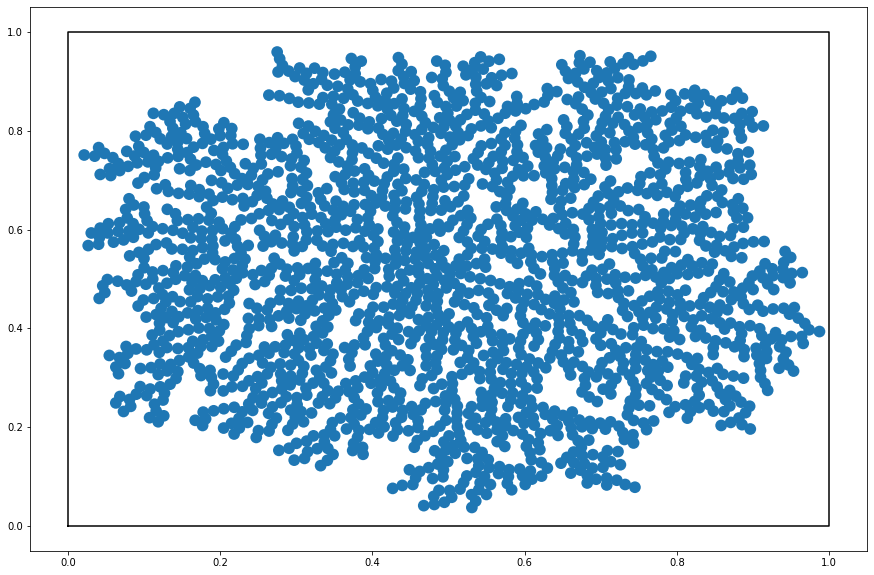

In [3]:
fig, ax = plt.subplots(figsize=(15, 10))
coll = matplotlib.collections.EllipseCollection(radius_array * 2, radius_array * 2,
                                                np.zeros_like(radius_array),
                                                offsets=positions, units='width',
                                                transOffset=ax.transData)
ax.plot([0, 1, 1, 0, 0], [0, 0, 1, 1, 0], 'k')
ax.add_collection(coll)
ax.set_xlim([-0.05, 1.05])
ax.set_ylim([-0.05, 1.05])
plt.show()

## Utility functions

In [4]:
def compute_Nx(epsilon_values, starting_position, particle_positions, radius):
    distance = norm(particle_positions - np.tile(starting_position, reps=(len(particle_positions), 1)), axis=1)
    number_of_points_inside_epsilon = np.zeros_like(epsilon_values)
    for counter, epsilon in enumerate(epsilon_values):
        boolean = distance <= epsilon
        number_of_points_inside_epsilon[counter] = np.sum(boolean)
    return number_of_points_inside_epsilon

def compute_C(particle_positions, radius):
    epsilon_val = np.linspace(radius*2, 1, 1000)
    number_of_points = np.zeros_like(epsilon_val)
    for i in range(len(particle_positions)):
        particle_pos = particle_positions[i, :]
        number_of_points += compute_Nx(epsilon_val, particle_pos, particle_positions, radius)
    number_of_points /= len(particle_positions)
    return epsilon_val, number_of_points

## Fractal dimension around center in box

In [26]:
epsilon_val = np.linspace(radius, 0.75, 1000)
number_points = compute_Nx(epsilon_val, [0.5, 0.5], positions, radius)

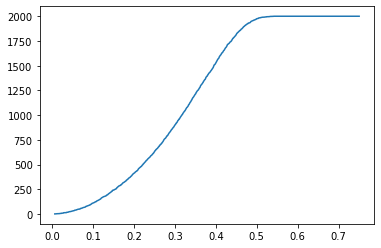

In [27]:
plt.plot(epsilon_val, number_points)
plt.show()

In [28]:
log_eps = np.log(epsilon_val)
log_N = np.log(number_points)

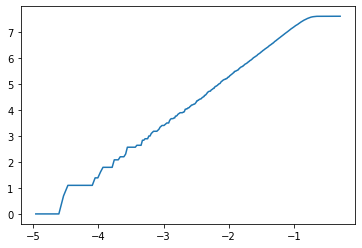

In [29]:
plt.plot(log_eps, log_N)
#plt.loglog(epsilon_val, number_points)
plt.show()

In [30]:
log_eps = log_eps[40:500]
log_N = log_N[40:500]

In [31]:
correlation_dimension, intercept, r_value, p_value, std_err = stats.linregress(log_eps, log_N)

In [32]:
correlation_dimension

1.9024691272499579

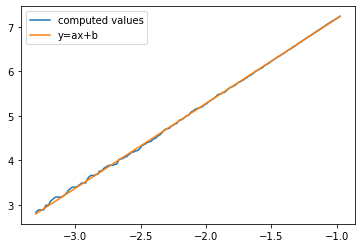

In [33]:
plt.plot(log_eps, log_N, label='computed values')
plt.plot(log_eps, log_eps*correlation_dimension+intercept, label='y=ax+b')
plt.legend()
plt.show()

## Fractal dimension for all points

In [34]:
epsilon_val = np.linspace(radius*2, 1, 1000)

In [35]:
epsilon_val, number_of_points = compute_C(positions, radius)

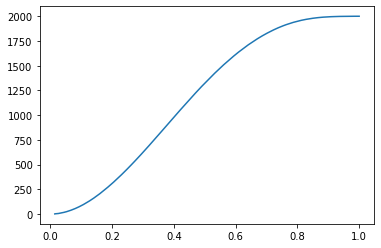

In [36]:
plt.plot(epsilon_val, number_of_points)
plt.show()

In [37]:
log_eps = np.log(epsilon_val)
log_C = np.log(number_of_points)

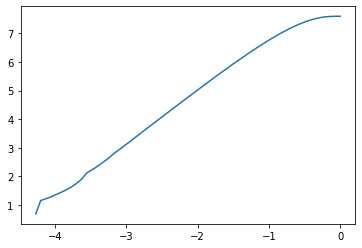

In [38]:
plt.plot(log_eps, log_C)
plt.show()

In [42]:
log_eps = log_eps[20:370]
log_C = log_C[20:370]

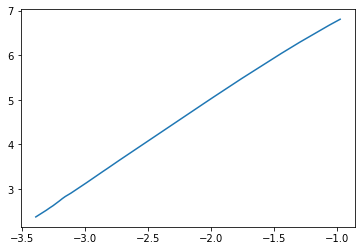

In [43]:
plt.plot(log_eps, log_C)
plt.show()

In [44]:
correlation_dimension, intercept, r_value, p_value, std_err = stats.linregress(log_eps, log_C)

In [45]:
correlation_dimension

1.8297640431812885